<a href="https://colab.research.google.com/github/Prabhat-Thapa45/AboutMe/blob/main/mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:
import numpy as np

Final weights: [-0.068  0.182]
Final bias: -0.04


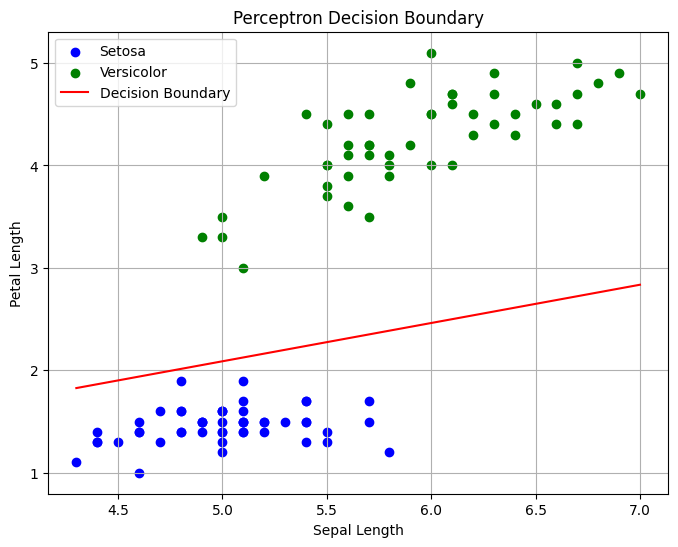

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Load the Iris dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
columns = ['sepal length', 'sepal width', 'petal length', 'petal width', 'species']
iris = pd.read_csv(url, header=None, names=columns)

# Filter the dataset to include only 'setosa' and 'versicolor'
iris = iris[iris['species'].isin(['Iris-setosa', 'Iris-versicolor'])]

# Convert species to numerical labels: 'setosa' -> -1, 'versicolor' -> 1
iris['species'] = np.where(iris['species'] == 'Iris-setosa', -1, 1)

# Extract features and labels
X = iris[['sepal length', 'petal length']].values  # Using two features for simplicity
y = iris['species'].values

# Initialize parameters
weights = np.zeros(X.shape[1])  # Two weights for two features
bias = 0
learning_rate = 0.01
epochs = 10

# Perceptron training loop
for epoch in range(epochs):
    for i in range(len(X)):
        # Calculate the score
        score = np.dot(X[i], weights) + bias
        # Predict the label
        prediction = 1 if score >= 0 else -1
        # Update weights and bias if prediction is incorrect
        if prediction != y[i]:
            weights += learning_rate * (y[i] - prediction) * X[i]
            bias += learning_rate * (y[i] - prediction)

# Print final weights and bias
print(f"Final weights: {weights}")
print(f"Final bias: {bias}")

# Visualize the decision boundary
plt.figure(figsize=(8, 6))
for species, color in [(-1, 'blue'), (1, 'green')]:
    subset = iris[iris['species'] == species]
    plt.scatter(subset['sepal length'], subset['petal length'], color=color, label='Setosa' if species == -1 else 'Versicolor')

# Plot decision boundary
x_values = np.linspace(X[:, 0].min(), X[:, 0].max(), 100)
y_values = -(weights[0] * x_values + bias) / weights[1]
plt.plot(x_values, y_values, color='red', label='Decision Boundary')

# Add labels and legend
plt.xlabel('Sepal Length')
plt.ylabel('Petal Length')
plt.title('Perceptron Decision Boundary')
plt.legend()
plt.grid(True)
plt.show()


In [2]:
X.shape

(100, 2)

In [48]:
import pickle
from sklearn.datasets import fetch_openml

In [49]:
file_path = "/content/mnist.pkl"

In [50]:
mnist = fetch_openml('mnist_784', version=1)

In [51]:
X, y = mnist['data'], mnist['target']

In [52]:
from sklearn.model_selection import train_test_split

In [6]:
X = X/255

In [53]:
X = X.values

In [81]:
X = (X>0).astype(int)

In [83]:
X[0]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0,

In [54]:
y = y.astype(int)

In [55]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [84]:
def create_binary_classifier_predictor(y_train, y_test):
  bc_train = {}
  bc_test = {}
  for i in range(10):
    bc_train[i] = np.where(y_train == i, 1, -1)
    bc_test[i] = np.where(y_test == i, 1, -1)
  return bc_train, bc_test

In [85]:
bc_train, bc_test = create_binary_classifier_predictor(y_train, y_test)

In [86]:
bc_train

{0: array([-1, -1, -1, ..., -1,  1,  1]),
 1: array([-1, -1, -1, ...,  1, -1, -1]),
 2: array([-1, -1, -1, ..., -1, -1, -1]),
 3: array([-1, -1, -1, ..., -1, -1, -1]),
 4: array([-1,  1, -1, ..., -1, -1, -1]),
 5: array([ 1, -1, -1, ..., -1, -1, -1]),
 6: array([-1, -1, -1, ..., -1, -1, -1]),
 7: array([-1, -1, -1, ..., -1, -1, -1]),
 8: array([-1, -1,  1, ..., -1, -1, -1]),
 9: array([-1, -1, -1, ..., -1, -1, -1])}

In [87]:
#initialise parameters
epochs = 20
lr = 0.02
weights = np.zeros(X_train.shape[1])
bias = 0

In [88]:
X_train.shape[1]

784

In [95]:
import numpy as np

def perceptron_train(X_train, y_train_binary, epochs, lr):
    # Initialize weights and bias
    weights = np.zeros(X_train.shape[1])
    bias = 0

    # Perceptron training loop
    for epoch in range(epochs):
        for i in range(X_train.shape[0]):
            # Calculate the score
            score = np.dot(X_train[i], weights) + bias
            # Predict based on score
            prediction = 1 if score >= 0 else -1
            # Update weights and bias if the prediction is incorrect
            if y_train_binary[i] != prediction:
                weights += lr * (y_train_binary[i] - prediction) * X_train[i]
                bias += lr * (y_train_binary[i] - prediction)
    return weights, bias

def perceptron_test(X_test, weights, bias):
    # Predict on test data
    y_pred = []
    for i in range(X_test.shape[0]):
        score = np.dot(X_test[i], weights) + bias
        prediction = 1 if score >= 0 else -1
        y_pred.append(prediction)
    return y_pred

# Example usage for digits 0–9
def train_perceptron_classifiers(X_train, y_train, X_test, y_test, epochs=20, lr=0.01):
    bc_train, bc_test = create_binary_classifier_predictor(y_train, y_test)
    classifiers = {}  # Store weights and bias for each digit
    accuracies = {}   # Store accuracy for each digit

    for digit in range(10):
        print(f"Training perceptron for digit {digit}...")
        # Get binary labels for the current digit
        y_train_binary = bc_train[digit]
        y_test_binary = bc_test[digit]
        # Train the perceptron
        weights, bias = perceptron_train(X_train, y_train_binary, epochs, lr)
        classifiers[digit] = (weights, bias)
        # Test the perceptron
        y_pred = perceptron_test(X_test, weights, bias)
        accuracy = np.mean(np.array(y_pred) == y_test_binary)
        accuracies[digit] = accuracy
        print(f"Accuracy for digit {digit}: {accuracy * 100:.2f}%")

    return classifiers, accuracies


In [96]:
# Assuming X_train, y_train, X_test, and y_test are already prepared
epochs = 20
learning_rate = 0.01
classifiers, accuracies = train_perceptron_classifiers(X_train, y_train, X_test, y_test, epochs, learning_rate)

# Print overall results
for digit, accuracy in accuracies.items():
    print(f"Digit {digit}: Accuracy = {accuracy * 100:.2f}%")


Training perceptron for digit 0...
Accuracy for digit 0: 98.01%
Training perceptron for digit 1...
Accuracy for digit 1: 98.98%
Training perceptron for digit 2...
Accuracy for digit 2: 97.18%
Training perceptron for digit 3...
Accuracy for digit 3: 96.51%
Training perceptron for digit 4...
Accuracy for digit 4: 97.85%
Training perceptron for digit 5...
Accuracy for digit 5: 93.65%
Training perceptron for digit 6...
Accuracy for digit 6: 98.03%
Training perceptron for digit 7...
Accuracy for digit 7: 97.81%
Training perceptron for digit 8...
Accuracy for digit 8: 88.01%
Training perceptron for digit 9...
Accuracy for digit 9: 93.15%
Digit 0: Accuracy = 98.01%
Digit 1: Accuracy = 98.98%
Digit 2: Accuracy = 97.18%
Digit 3: Accuracy = 96.51%
Digit 4: Accuracy = 97.85%
Digit 5: Accuracy = 93.65%
Digit 6: Accuracy = 98.03%
Digit 7: Accuracy = 97.81%
Digit 8: Accuracy = 88.01%
Digit 9: Accuracy = 93.15%


In [97]:
from PIL import Image

In [98]:
def predict_number(image_array, classifiers):
    predictions = []
    for digit, (weights, bias) in classifiers.items():
        # Calculate the score for the current digit
        score = np.dot(image_array, weights) + bias
        # Predict based on the score
        prediction = 1 if score >= 0 else -1
        if prediction == 1:  # If classifier predicts the image matches the digit
            predictions.append(digit)
    # Return the predicted digit (if multiple classifiers predict, take the first match)
    return predictions[0] if predictions else "Unknown"


In [99]:
def detect_number(image_path, classifiers):
    image_array = preprocess_image(image_path)  # Preprocess the uploaded image
    number = predict_number(image_array, classifiers)  # Predict the digit
    return number


In [124]:
predict_number(a, classifiers)

8

In [134]:
import numpy as np
from PIL import Image

def preprocess_image(image_path):
    img = Image.open(image_path).convert('L')  # Convert to grayscale
    img = img.resize((28, 28))  # Resize
    img_array = np.array(img).astype(np.float32)  # Convert to float
    img_array /= 255.0  # Normalize pixel values to [0, 1]

    # Invert the image (change white to black and black to white)
    img_array = 1 - img_array

    print()
    plt.imshow(img_array, cmap='gray')  # Use 'gray' colormap for grayscale images
    plt.axis('off')  # Hide axis labels
    plt.show()  # Print the processed values
    return img_array.flatten()  # Flatten for model input




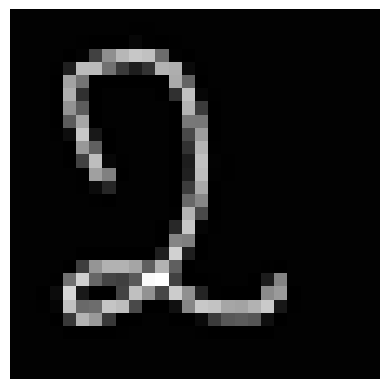

The detected number is: 2


In [139]:
image_path = "/content/2.png"  # Replace with the actual image file path
detected_number = detect_number(image_path, classifiers)
print(f"The detected number is: {detected_number}")


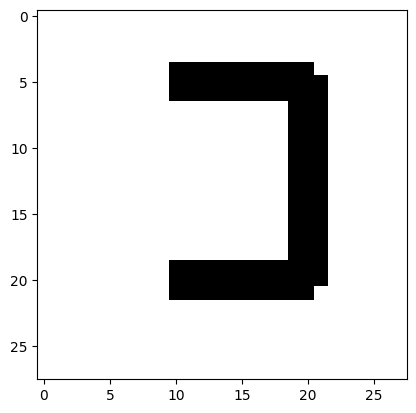

In [103]:
plt.imshow(img_array.reshape(28, 28), cmap='gray')
plt.show()



In [ ]:
for digit, (weights, bias) in classifiers.items():
    score = np.dot(image_array, weights) + bias
    print(f"Digit {digit}: Score = {score}")


In [69]:
plt.imshow(image_array.reshape(28, 28), cmap='gray')
plt.show()


NameError: name 'image_array' is not defined

In [136]:
from PIL import Image, ImageDraw, ImageFont

# Create a blank image (grayscale, 28x28 pixels, white background)
img = Image.new('L', (28, 28), color=255)
draw = ImageDraw.Draw(img)

# Draw the number "9"
try:
    # Try using a font if available
    font = ImageFont.truetype("arial.ttf", 22)
    draw.text((8, 2), "9", font=font, fill=0)  # Adjust position for better alignment
except:
    # Fallback: Draw manually if font not found
    draw.arc([(6, 4), (22, 20)], start=0, end=360, fill=0, width=3)  # Top loop
    draw.line([(14, 12), (14, 24)], fill=0, width=3)  # Vertical tail of "9"

# Save and display the image
img.save("digit_1.png")
img.show()
